<a href="https://colab.research.google.com/github/santhosh47/Data_Science_and_ML_Tutorial/blob/main/DS_45_Dealing_with_Categorical_Variable_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to Include Dummy Variables into a Regression**

Apart from the offensive use of the word “dummy”, there is another meaning – an imitation or a copy that stands as a substitute.

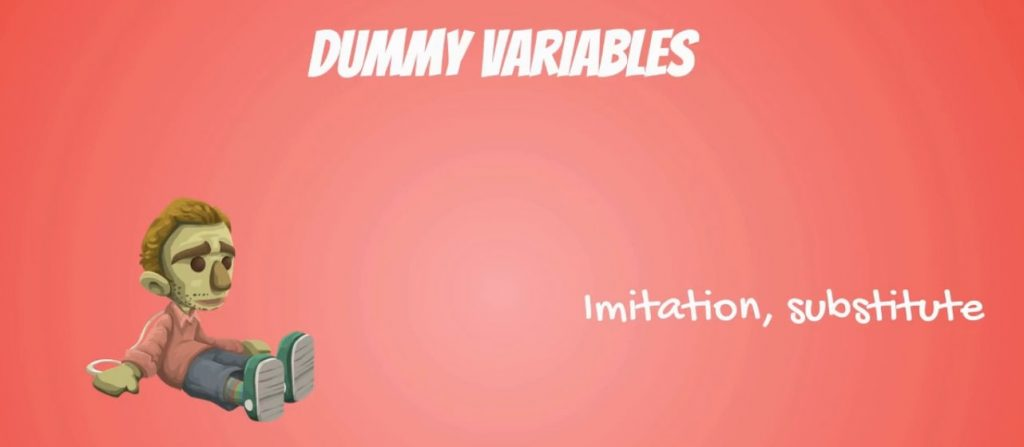


## **What Is a Dummy Variable?**
In regression analysis, a dummy is a variable that is used to include categorical data into a regression model. In previous tutorials, we have only used numerical data.However, representing numbers on a scale makes more sense than representing categories like gender or season. It’s time to find out how to include such variables into a regression we are working with.

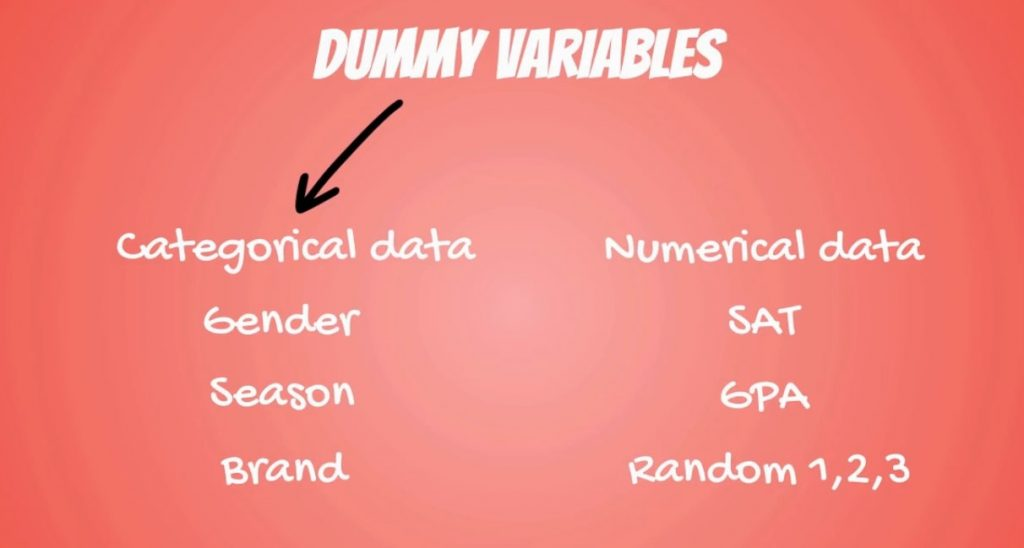

##**How to Include Categorical Data Into a Regression**
Firstly, make sure that you check the article where we made our first steps into the world of linear regressions. We will be using the SAT-GPA example from there. If you don’t have time to read it, here is a brief explanation: Based on the SAT score of a student, we can predict his GPA. Now, we can improve our prediction by adding another regressor – attendance.

In the picture below, you can see a dataset that includes a variable that measures if a student attended more than 75% of their university lectures.

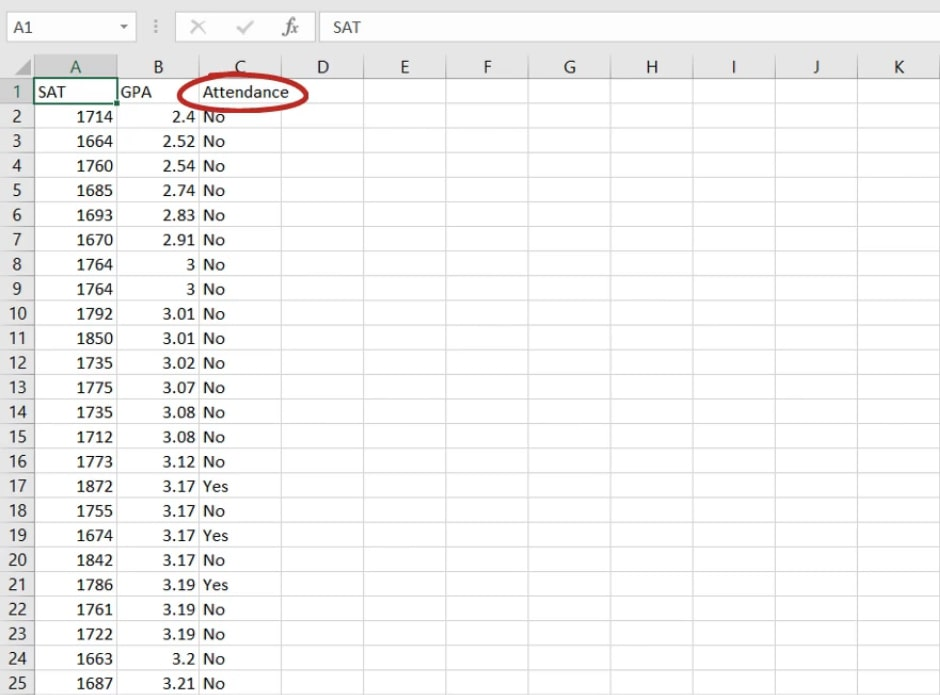

Keep in mind that this is categorical data, so we cannot simply put it in the regression.

We will start off by going through the process of using a dummy and explain it later.

## **Using a Dummy Variable**
The time has come to write some code. We can begin by importing the relevant libraries by writing:



In [ ]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

import seaborn as sns sns.set()

After that, let’s load the file ’1.03. Dummies.csv’ into the variable raw_data. [You can download the file from here](https://365datascience.com/resources/downloadables/1.03.%20Dummies.csv). If you don’t know how to load it, here’s what you need to type:

In [ ]:
raw_data = pd.read_csv('1.03. Dummies.csv')

Now, let’s simply write

In [ ]:
raw_data

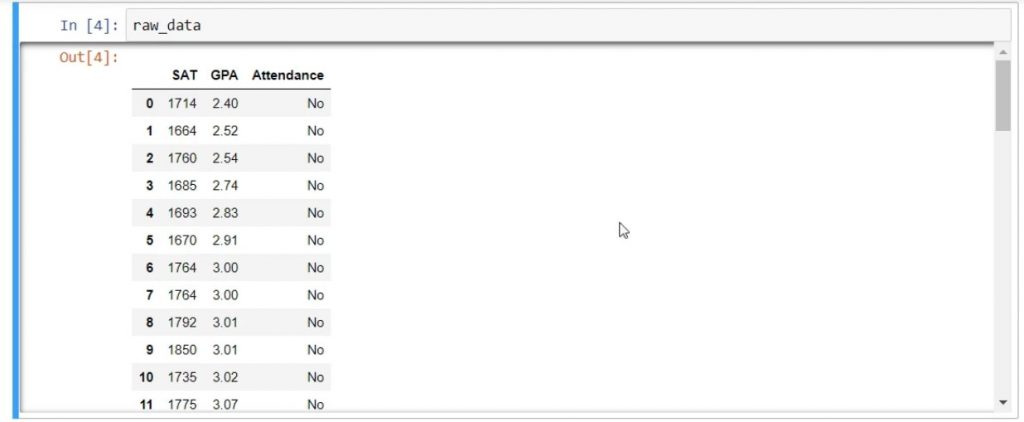

As you can tell from the picture above, there is a third column named ‘Attendance’. It reflects if a student attended more than 75% of the lessons with two possibilities – Yes and No.

## **Mapping Values**
What we would usually do in such cases is to map the Yes/No values with 1s and 0s. In this way, if the student attended more than 75% of the lessons, the dummy will be equal to 1. Otherwise, it will be a 0.

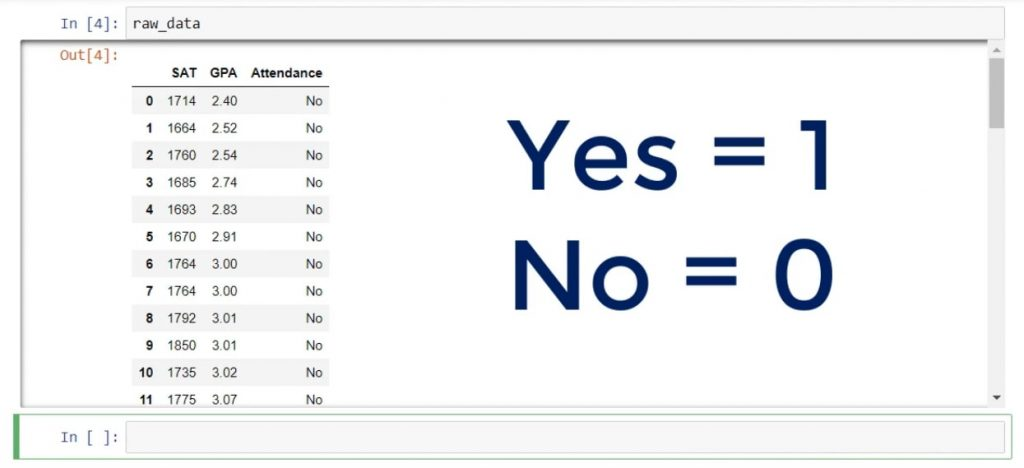

So, we will have transformed our yes/no question into 0s and 1s. That’s what the dummy name stands for – we are imitating the categories with numbers.

##**How to Do it**
In pandas, that’s done quite intuitively.

Let’s create a new variable data equal to raw_data. This is what we need to run:

In [ ]:
data = raw_data.copy()

Then, we have to overwrite the series ‘attendance’ in the data frame. So, this is how the code should look like:

In [ ]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No' : 0})

This is the proper syntax to map Yes to 1 and No to 0.

We can write



In [ ]:
data

and find out if we have done our job.

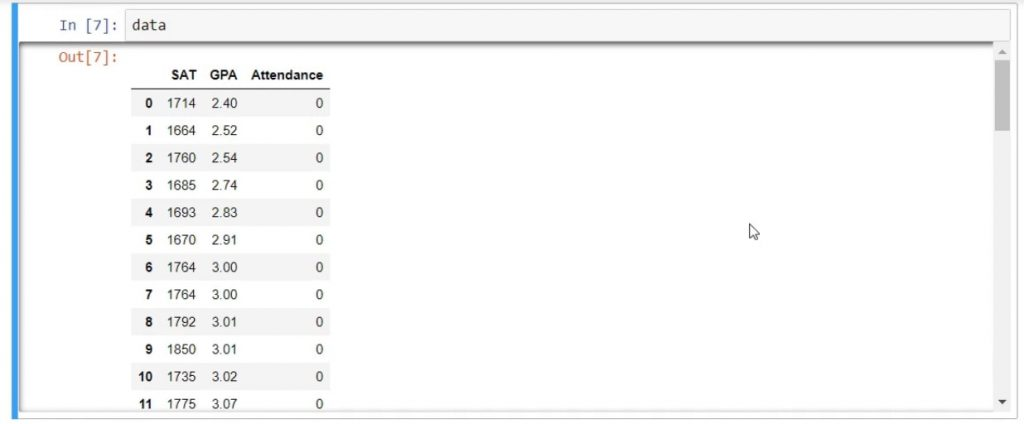

As you can see in the picture above, we have successfully created a dummy variable! The categorical data in the series was replaced or mapped to numerical.

## **The Descriptive Statistics**
Let’s take a look at the descriptive statistics of the variables. We can do that by writing:

In [ ]:
data.describe()

The mean of ‘Attended more than 75%’ is 0.46, as shown below.

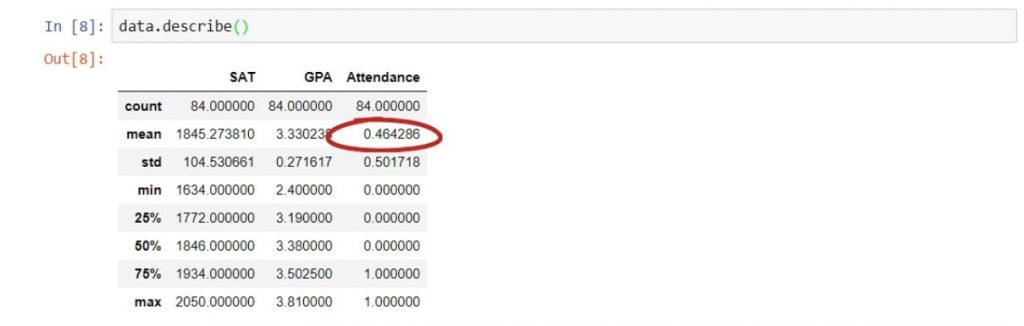

The fact that the mean is less than 0.5 gives us the information that there are more 0s than 1s. Since the two outcomes are 0 and 1, this implies that 46% of the students have attended more than 75% of the lessons.

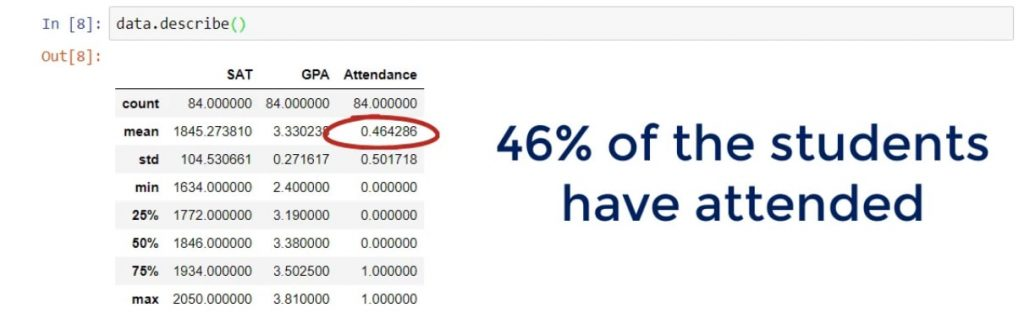

In any case, now we can create a regression that explains GPA taking  both SAT scores and attendance into consideration.

##**Creating the Regression**
We can load GPA in the variable y, and SAT, and ‘Attendance’ in the variable x1. This is the code we need to run:



In [ ]:
y = data['GPA']

x1 = data[['SAT', 'Attendance']]

We must use the statsmodels method for adding a constant. Then we can fit the regression and get the summary as before.

In [ ]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

## **The Results**
As you can see in the picture below, our overall model is significant,

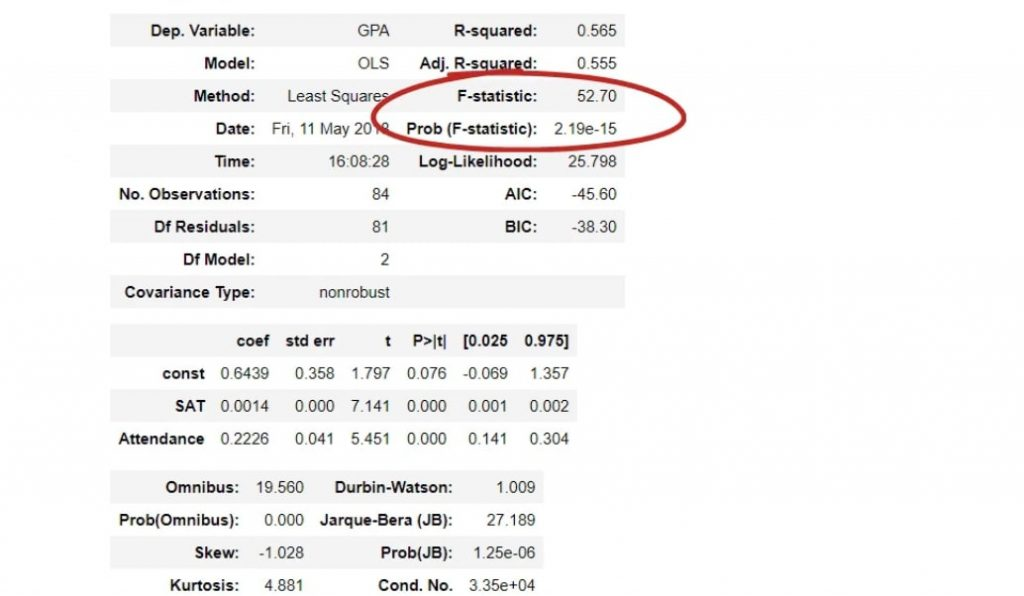

he SAT score is significant, and the dummy variable is significant.

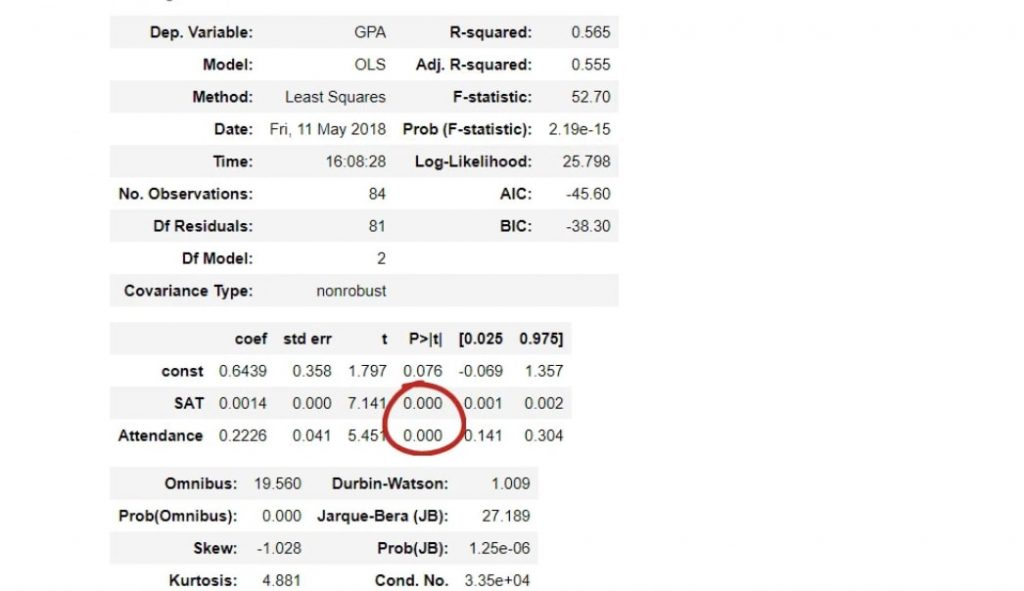

The adjusted R-squared of this model is 0.555, which is a great improvement from what we would get without attendance.

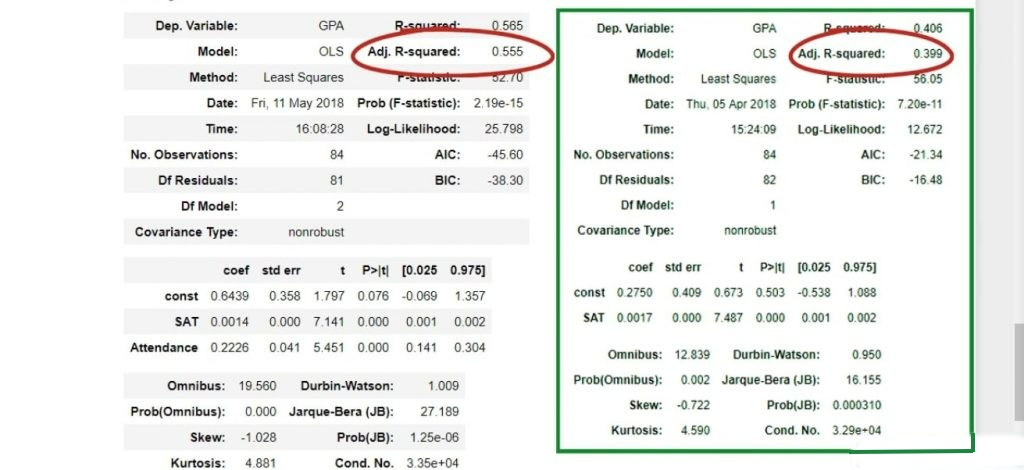

A model without the dummy variable would be:

GPA = 0.275 + 0.0017 * the SAT score of a student.

The model, including the dummy variable is:

GPA = 0.6439 + 0.0014 * the SAT score of a student + 0.2226 * the dummy variable.

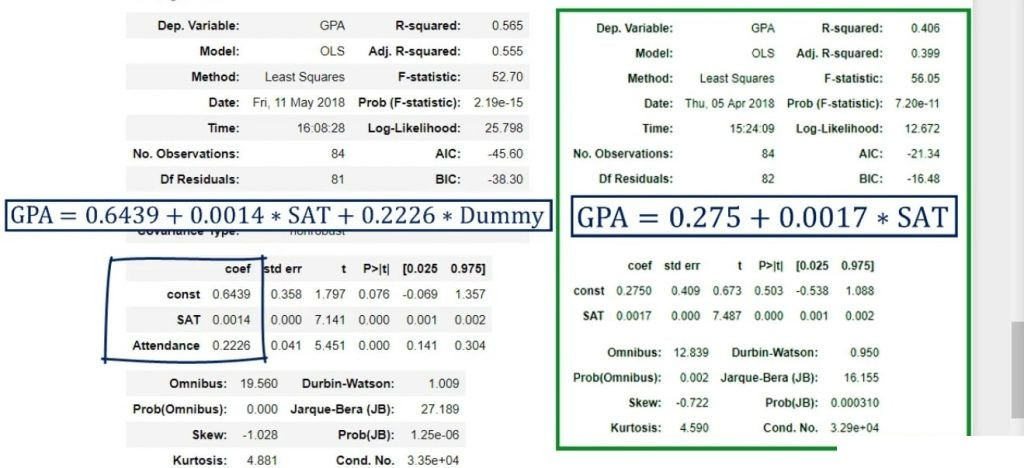



## **Explaining the Equation**
Now, we said that the dummy is 0 or 1, so actually we can represent this equation with two others.

If the student did not attend, the dummy would be 0. So, 0.2226 * 0 is 0. The model becomes GPA = 0.6439 + 0.0014 * SAT.

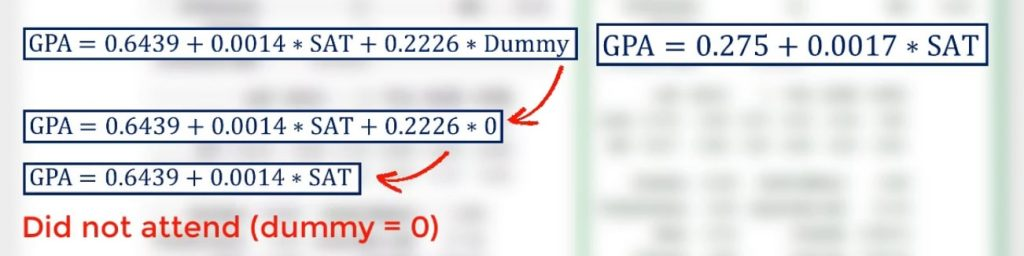

If the student attended, the dummy variable would be 1, so the model becomes:

GPA = 0.6439 + 0.0014 * SAT + 0.2226.

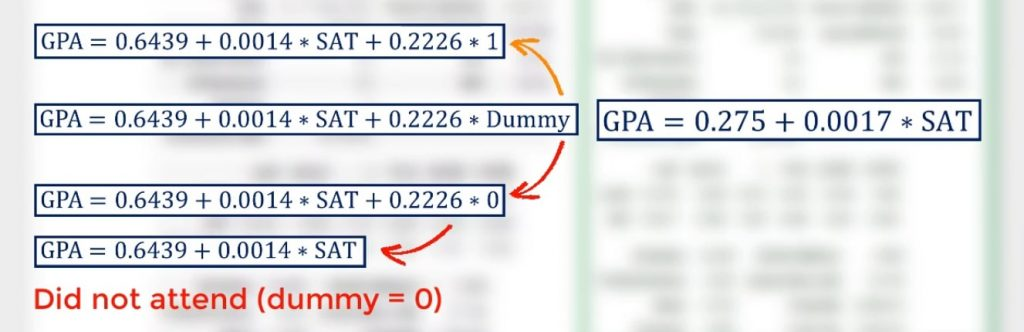



Let’s add the intercept and the dummy together.

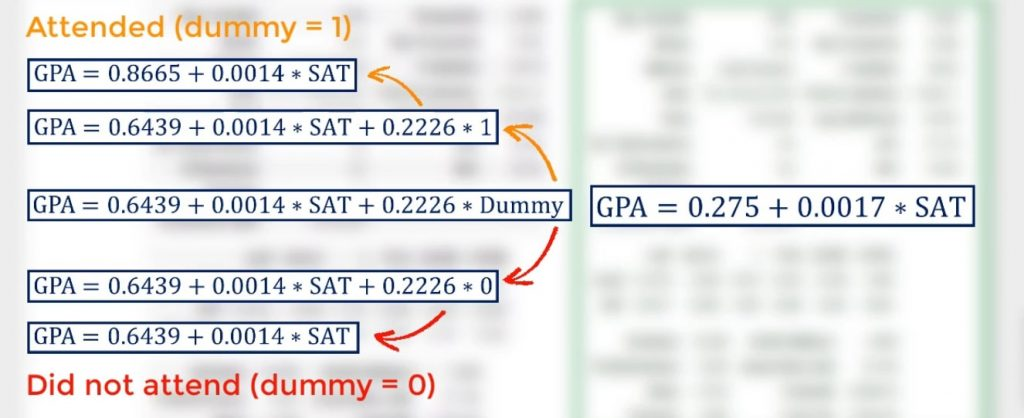

As you can see in the picture above, we got GPA = 0.8665 + 0.0014 * SAT.

## **Plotting the Data**
There will be two equations, which we can call yhat_no, and yhat_yes. They will represent the two equations we just talked about. Certainly, we can parametrize these equations, but there is no need for such a simple example.

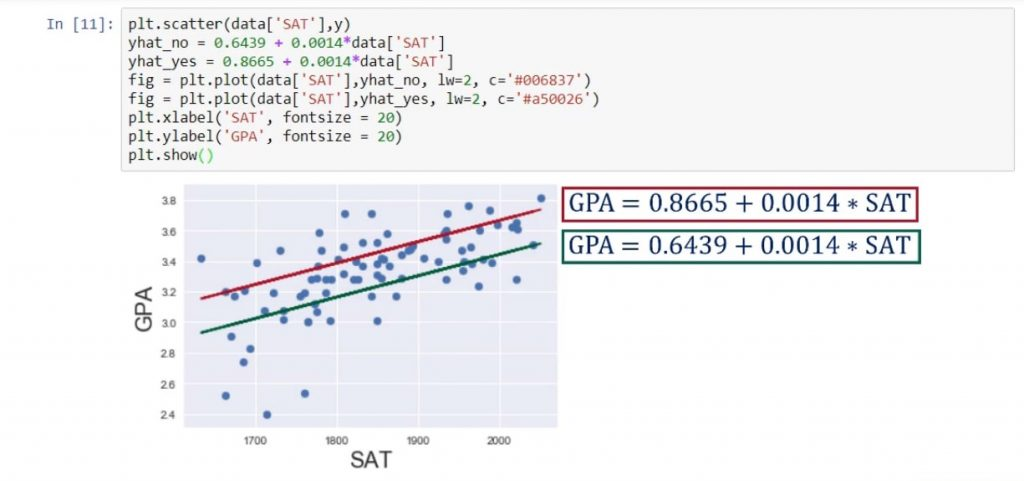

On average, their GPA is 0.2226 higher than the GPA of students who did not attend.

We can even think about these as two separate regressions. We can color the points, which refer to students who attended classes, so the red line, and students who did not attend – the green line.



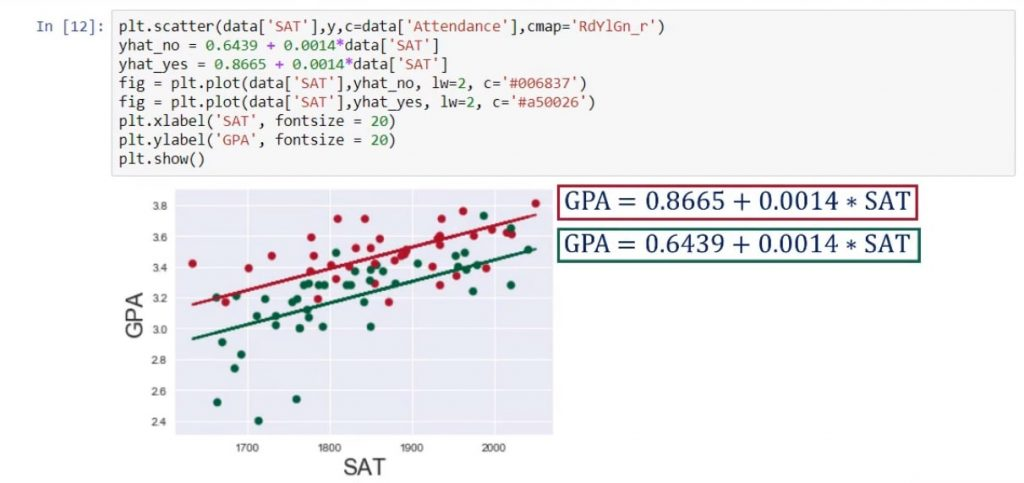

You can clearly see the difference now.

Finally, we will put the original regression line on the graph.

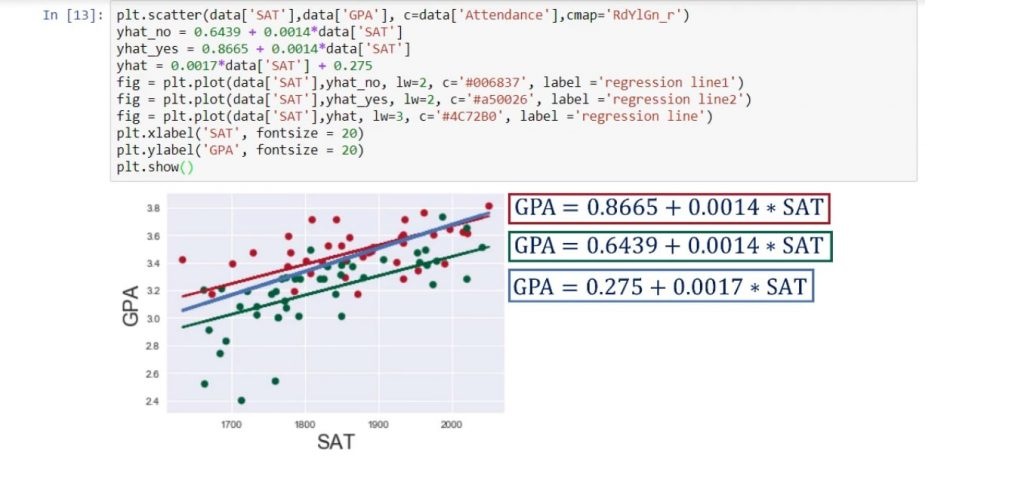

s you can see, it is steeper and goes somewhat between the two lines of the dummies.

To use this model for prediction purposes, we need two pieces of information: an SAT score and whether a person attended more than 75% of their lectures.

##**The Process of Adding a Dummy Variable into a Regression**
So, why do we even need dummy variables? We can simply use numerical data all the time and we won’t have any problems, right?

Well, not really. Whenever we have to represent categorical data, such as brands, a dummy is what we need.

* We map the categories.
* Then we drop one of them, which serves as the baseline model
* We just deal with it.

As you can see, the process of creating a regression even with categorical data is not brain surgery.